### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 4


### Дисциплина: Методы машинного обучения

##### Студент:  Бармина Ольга Константиновна
##### Группа:   НФИбд-01-19

## Москва 2022
***

### Вариант №13

Задание:

Для закрепленного за Вами варианта лабораторной работы:

1.	Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимые признаки и метку класса.

2.	Визуализируйте точки набора данных на плоскости с координатами, соответствующими двум независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.

3.	Если признак с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации. Объединяйте классы таким образом, чтобы положительный и отрицательный классы были сопоставимы по количеству точек. 

4.	Разбейте набор данных из двух признаков и меток класса на обучающую и тестовую выборки. Постройте нейронную сеть с нормализующим слоем и параметрами, указанными в индивидуальном задании, для бинарной классификации и обучите ее на обучающей выборке. Оцените качество бинарной классификации при помощи матрицы ошибок для тестовой выборки.

5.	Визуализируйте границы принятия решений построенной нейронной сетью на обучающей и тестовой выборках.

6.	Визуализируйте ROC-кривую для построенного классификатора и вычислите площадь под ROC-кривой методом трапеций или иным методом.

7.	Обучите на полном наборе данных нейронную сеть с одним слоем и одним выходным нейроном с функцией активации сигмоида и определите дополнительный признак, отличный от указанных в задании двух независимых признаков, принимающий непрерывные значения и являющийся важным по абсолютному значению веса в обученной нейронной сети. 

8.	Визуализируйте точки набора данных в трехмерном пространстве с координатами, соответствующими трем независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.

9.	Разбейте полный набор данных на обучающую и тестовую выборки. Постройте нейронную сеть с нормализующим слоем и параметрами, указанными в индивидуальном задании, для многоклассовой классификации и обучите ее на обучающей выборке.

10.	Постройте кривые обучения в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

Условия варианта:

1. Набор данных: diamonds 

2. Независимые признаки: carat, table 

3. Метка класса: color 

4. Параметры глубокой нейронной сети: кол-во скрытых слоев – 3, кол-во нейронов в скрытом слое – 128. 

In [ ]:
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import roc_auc_score

In [ ]:
# загрузим датасет и преобразуем его в датафрейм
ds = tfds.load("diamonds", split = 'train')
df = tfds.as_dataframe(ds)
df = pd.DataFrame(df)

df.head()

,features/carat,features/clarity,features/color,features/cut,features/depth,features/table,features/x,features/y,features/z,price
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,646.0


In [ ]:
# Независимые переменные (x1, x2) и метка класса (у)
X = df[["features/carat", "features/table"]].to_numpy()
y = df['features/color'].to_numpy()

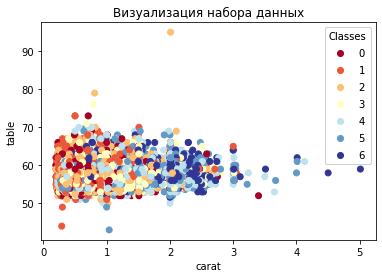

In [ ]:
# визуализируем точки набора данных, разделив их по классам
fig, ax = plt.subplots()
scatter = ax.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.RdYlBu);
ax.set_xlabel("carat")
ax.set_ylabel("table")
ax.set_title("Визуализация набора данных")

legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

In [ ]:
# изменим количество классов на 2, объеденив все классы 0-3 под лейбл 0, а классы 4-7 под лейбл 1
for i in range(len(y)):
  if y[i] < 4:
    y[i] = 0
  else:
    y[i] = 1

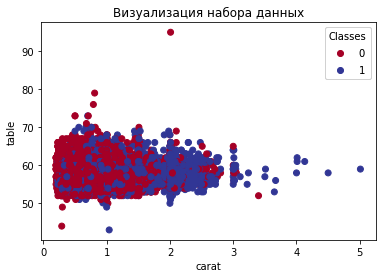

In [ ]:
# визуализируем новое классовое разбиение
fig, ax = plt.subplots()
scatter = ax.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.RdYlBu);
ax.set_xlabel("carat")
ax.set_ylabel("table")
ax.set_title("Визуализация набора данных")

legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

In [ ]:
# пропишем функцию для разбиения датасета на тестовый и тренировочный
def train_test_split(X, y, test_ratio=0.2, seed=None):
    """возвращает X_train, X_test, y_train, y_test"""
    assert X.shape[0] == y.shape[0], \
        "Размер X должен быть равен размеру y"
    assert 0.0 <= test_ratio <= 1.0, \
        "Неверное значение test_ratio"

    if seed:
        np.random.seed(seed)

    shuffled_indexes = np.random.permutation(len(X))

    test_size = int(len(X) * test_ratio)
    test_indexes = shuffled_indexes[:test_size]
    train_indexes = shuffled_indexes[test_size:]

    X_train = X[train_indexes]
    y_train = y[train_indexes]

    X_test = X[test_indexes]
    y_test = y[test_indexes]

    return X_train, X_test, y_train, y_test

In [ ]:
# разобьем датасет
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_ratio=0.2, seed=42
)

In [ ]:
# построим нейронную сеть, согласно заданию и пропишем нормалайзер
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X.shape[1],)) 
feature_normalizer.adapt(X_train)

In [ ]:
model = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_20 (Normaliza  (None, 2)                3         
 tion)                                                           
                                                                 
 dense_70 (Dense)            (None, 128)               384       
                                                                 
 dense_71 (Dense)            (None, 128)               16512     
                                                                 
 dense_72 (Dense)            (None, 128)               16512     
                                                                 
 dense_73 (Dense)            (None, 1)                 129       
                                                                 
Total params: 33,540
Trainable params: 33,537
Non-trainable params: 3
_________________________________________________

In [ ]:
# обучим сеть
model.compile(loss=tf.keras.losses.binary_crossentropy)
model.fit(X_train, y_train, epochs=10, verbose=0)

In [ ]:
# посмотрим предсказания нейросети
prediction = model.predict(X_test)
y_pred = np.array([1 if prob > 0.25 else 0 for prob in np.ravel(prediction)])
print(y_pred)

[1 1 1 ... 1 0 1]


In [ ]:
prediction

array([[0.2717939 ],
       [0.2592603 ],
       [0.26652622],
       ...,
       [0.25974002],
       [0.24239576],
       [0.33173594]], dtype=float32)

In [ ]:
# пропишем доп. функции для построения матрицы ошибок
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))

def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))

def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))

def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))

def confusion_matrix(y_true, y_predict):
    return np.array([
        [TN(y_true, y_predict), FP(y_true, y_predict)],
        [FN(y_true, y_predict), TP(y_true, y_predict)]
    ])

In [ ]:
# выведем эту матрицу
confusion_matrix(y_test, y_pred)

array([[2490, 5013],
       [ 685, 2600]])

In [ ]:
# пропишем функцию для построения границ принятия решений
def plot_decision_boundary(model, X, y):
    # Найдем диапазоны изменения по осям и построим сетку
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    # Набор данных для прогнозирования
    X_in = np.c_[xx.ravel(), yy.ravel()] 
    # Прогноз при помощи обученной модели
    y_pred = model.predict(X_in)
    # Проверка мультиклассовости
    if len(y_pred[1]) > 1:
        # мультиклассовая классификация
        # изменяем форму прогноза для визуализации 
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        # бинарная классификация 
        y_pred = np.array([1 if prob > 0.25 else 0 for prob in y_pred]).reshape(xx.shape)
    # Рисуем границу решения
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a f

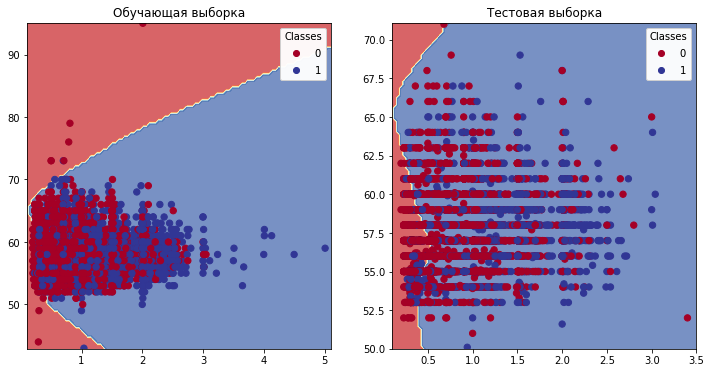

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Обучающая выборка")
plot_decision_boundary(model, X=X_train, y=y_train)
legend1 = plt.subplot(1, 2, 1).legend(*scatter.legend_elements(), title="Classes")
plt.subplot(1, 2, 1).add_artist(legend1)

plt.subplot(1, 2, 2)
plt.title("Тестовая выборка")
plot_decision_boundary(model, X=X_test, y=y_test)
legend1 = plt.subplot(1, 2, 2).legend(*scatter.legend_elements(), title="Classes")
plt.subplot(1, 2, 2).add_artist(legend1)

In [ ]:
# пропишем функции для построения ROC кривой
def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr

def roc_from_scratch(probabilities, y_test, partitions=100):
    roc = np.array([])
    for i in range(partitions + 1):
        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc = np.append(roc, [fpr, tpr])
        
    return roc.reshape(-1, 2)

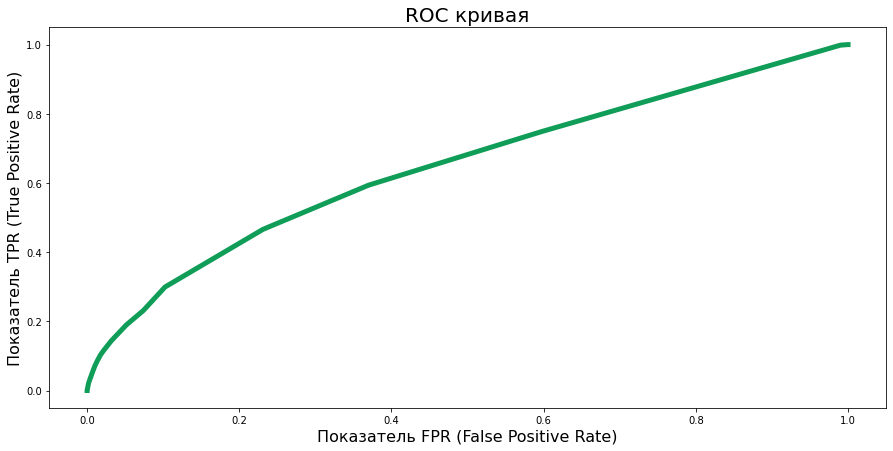

In [ ]:
# визуализируем эту кривую
prediction = model.predict(X)
plt.figure(figsize=(15,7))

ROC = roc_from_scratch(prediction.reshape(-1),y,partitions=50)
#plt.scatter(ROC[:,0],ROC[:,1],color='#0F9D58',s=100)
plt.plot(ROC[:,0],ROC[:,1],color='#0F9D58',lw=5)
plt.title('ROC кривая',fontsize=20)
plt.xlabel('Показатель FPR (False Positive Rate)',fontsize=16)
plt.ylabel('Показатель TPR (True Positive Rate)',fontsize=16);

In [ ]:
#вычислим площадь под кривой с помощью встроенного метода sklearn
roc_auc_score(y, prediction.reshape(-1))

0.6473571515592512

In [ ]:
# обучим нейросеть на полном наборе данных
# для этого отбросим из датасета лишь признак по которому производим классификацию
X = np.array(df.drop('features/color', axis=1))

In [ ]:
# построим нейросеть с одним выходным нейроном и нормализующим слоем
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X.shape[1],)) 
feature_normalizer.adapt(X)

In [ ]:
model_aux = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_aux.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_17 (Normaliza  (None, 9)                3         
 tion)                                                           
                                                                 
 dense_61 (Dense)            (None, 1)                 10        
                                                                 
Total params: 13
Trainable params: 10
Non-trainable params: 3
_________________________________________________________________


In [ ]:
model_aux.compile(loss=tf.keras.losses.binary_crossentropy)
model_aux.fit(X, y, epochs=100, verbose=0);

In [ ]:
# посмотр значения весов для каждого признака
model_aux.layers[1].kernel

<tf.Variable 'dense_61/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[ 1.0233089 ],
       [ 0.6180477 ],
       [ 0.41571608],
       [-0.038045  ],
       [ 0.23303507],
       [ 0.32696283],
       [ 1.0760382 ],
       [ 0.04334074],
       [ 0.13705035]], dtype=float32)>

In [ ]:
df.sample(5)
# наибольшее абсолютное значение - 1.1219008 имеет признак №6 - features/table, но он указан в задании
# следующий по величине - 0.7887794, признак - features/x

,features/carat,features/clarity,features/color,features/cut,features/depth,features/table,features/x,features/y,features/z,price
11336,0.34,3,1,3,61.700001,60.0,4.51,4.47,2.77,689.0
1687,1.50,2,0,4,61.900002,57.0,7.37,7.31,4.54,9828.0
32387,1.01,1,0,3,60.400002,59.0,6.57,6.52,3.95,4327.0
34437,0.84,1,0,2,63.599998,57.0,5.95,6.00,3.80,3145.0
10756,0.74,4,0,2,61.700001,57.0,5.79,5.85,3.59,3226.0


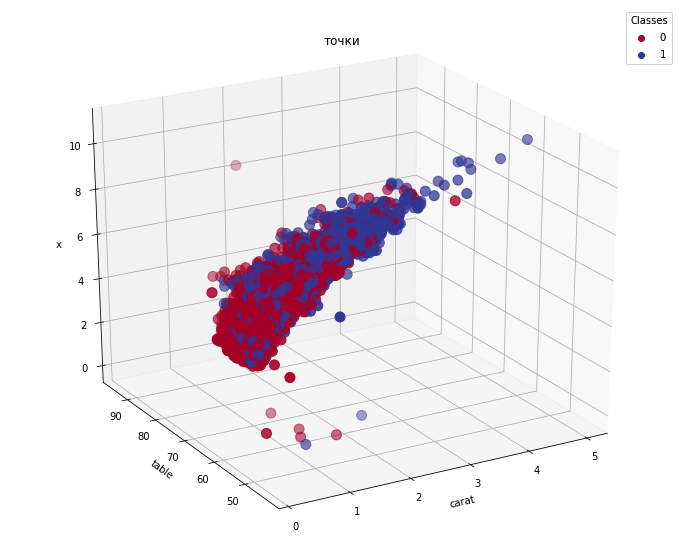

In [ ]:





















# визуализируем точки набора данных в трехмерном пространстве
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(12,10)) 
ax = plt.axes(projection='3d') 

ax.scatter(df['features/carat'], df['features/table'], df['features/x'], s=100, c = df['features/color'], cmap = plt.cm.RdYlBu) 
ax.set_xlabel('carat') 
ax.set_ylabel('table') 
ax.set_zlabel('x') 
ax.set_title('точки')
ax.view_init( azim=-120, elev=25 )
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

In [ ]:
# сделаем многоклассовую классификацию
# обновим датасет, чтобы вернуть истинные значения признака-классификатора
# отбросим его из датасета и запишем в отдельную переменную
df = tfds.as_dataframe(ds)
X = np.array(df.drop('features/color', axis=1))
y = np.array(df['features/color'])

In [ ]:
# разобьем выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_ratio=0.2, seed=42
)

In [ ]:
def to_one_hot(labels, dimension=7):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [ ]:
# преобразуем лейбы в массивы 0 и 1, где 1 стоит на месте с индексом значния лейбла
y_train = to_one_hot(y_train)
y_test = to_one_hot(y_test)
y_train.shape, y_test.shape

((43152, 7), (10788, 7))

In [ ]:
# строим глубокую нейросеть с нормализующим слоем
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X.shape[1],)) 
feature_normalizer.adapt(X_train)

In [ ]:
model = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(7, activation="softmax")
])

In [ ]:
model.compile(optimizer="Adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    verbose=1,
                    validation_split = 0.2)

Epoch 1/20
1079/1079 [==============================] - 3s 3ms/step - loss: 1.8591 - accuracy: 0.2075 - val_loss: 1.8530 - val_accuracy: 0.2143
Epoch 2/20
1079/1079 [==============================] - 3s 2ms/step - loss: 1.8504 - accuracy: 0.2151 - val_loss: 1.8493 - val_accuracy: 0.2111
Epoch 3/20
1079/1079 [==============================] - 3s 2ms/step - loss: 1.8486 - accuracy: 0.2147 - val_loss: 1.8457 - val_accuracy: 0.2207
Epoch 4/20
1079/1079 [==============================] - 3s 2ms/step - loss: 1.8476 - accuracy: 0.2186 - val_loss: 1.8454 - val_accuracy: 0.2200
Epoch 5/20
1079/1079 [==============================] - 3s 2ms/step - loss: 1.8464 - accuracy: 0.2231 - val_loss: 1.8439 - val_accuracy: 0.2278
Epoch 6/20
1079/1079 [==============================] - 3s 2ms/step - loss: 1.8449 - accuracy: 0.2244 - val_loss: 1.8423 - val_accuracy: 0.2201
Epoch 7/20
1079/1079 [==============================] - 3s 3ms/step - loss: 1.8442 - accuracy: 0.2255 - val_loss: 1.8432 - val_accuracy:

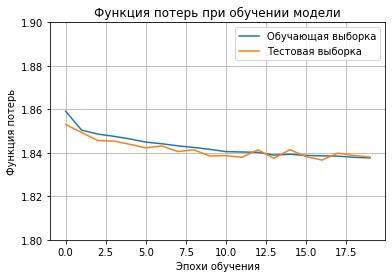

In [ ]:
# посмотрим кривые обучения
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylim([1.8, 1.9])
  plt.title('Функция потерь при обучении модели')
  plt.xlabel('Эпохи обучения')
  plt.ylabel('Функция потерь')
  plt.legend(['Обучающая выборка', 'Тестовая выборка'], loc='upper right')
  plt.grid(True)

plot_loss(history)